In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.ticker import FormatStrFormatter
# Suppress FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-10000-clean-data-eda/Student_performance_10k.csv


# **Step 1:** *Loading Dataset* 
1. Load the dataset into a pandas DataFrame using pd.read_csv().
2. Display the first few rows of the dataset using .head().

In [2]:
df = pd.read_csv('/kaggle/input/students-performance-10000-clean-data-eda/Student_performance_10k.csv')
df.head(5)

,roll_no,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade
0,std-01,male,group D,some college,1.0,1.0,89,38.0,85.0,26.0,238.0,C
1,std-02,male,group B,high school,1.0,0.0,65,100.0,67.0,96.0,328.0,A
2,std-03,male,group C,master's degree,1.0,0.0,10,99.0,97.0,58.0,264.0,B
3,std-04,male,group D,some college,1.0,1.0,22,51.0,41.0,84.0,198.0,D
4,std-05,male,group C,some college,0.0,1.0,26,58.0,64.0,65.0,213.0,C


# **Step 2:** *Understanding the Data*
1. Check the shape of the dataset using .shape to see the number of rows and columns.
2. Display the column names using .columns
3. Use .info() to examine the data types and the number of non-null values in each column
4. Use .describe() to get a summary of numeric columns (mean, min, max, standard deviation).

In [3]:
# Check the shape of the dataset
print("Shape of dataset:", df.shape)

Shape of dataset: (10000, 12)


In [4]:
# Display column names
print("Columns:", df.columns)

Columns: Index(['roll_no', 'gender', 'race_ethnicity', 'parental_level_of_education',
       'lunch', 'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'science_score', 'total_score', 'grade'],
      dtype='object')


In [5]:
# Examine data types and non-null values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   roll_no                      9999 non-null   object 
 1   gender                       9982 non-null   object 
 2   race_ethnicity               9977 non-null   object 
 3   parental_level_of_education  9978 non-null   object 
 4   lunch                        9976 non-null   float64
 5   test_preparation_course      9977 non-null   float64
 6   math_score                   9976 non-null   object 
 7   reading_score                9975 non-null   float64
 8   writing_score                9976 non-null   float64
 9   science_score                9977 non-null   float64
 10  total_score                  9981 non-null   float64
 11  grade                        9997 non-null   object 
dtypes: float64(6), object(6)
memory usage: 937.6+ KB
None


In [6]:
# Summary of numeric columns
print(df.describe())

             lunch  test_preparation_course  reading_score  writing_score  \
count  9976.000000              9977.000000    9975.000000    9976.000000   
mean      0.644246                 0.388694      70.125915      71.415798   
std       0.478765                 0.487478      19.026245      18.245360   
min       0.000000                 0.000000      17.000000      10.000000   
25%       0.000000                 0.000000      57.000000      59.000000   
50%       1.000000                 0.000000      71.000000      72.500000   
75%       1.000000                 1.000000      85.000000      85.000000   
max       1.000000                 1.000000     100.000000     100.000000   

       science_score  total_score  
count    9977.000000  9981.000000  
mean       66.063045   264.740908  
std        19.324331    42.304858  
min         9.000000    89.000000  
25%        53.000000   237.000000  
50%        67.000000   268.000000  
75%        81.000000   294.000000  
max       100.0000

# **Step 3:** *Identifying Missing Values*
1. Check for missing values using .isnull().sum().
2. Visualize missing data using a heatmap (sns.heatmap) to see patterns of missingness

In [7]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 roll_no                         1
gender                         18
race_ethnicity                 23
parental_level_of_education    22
lunch                          24
test_preparation_course        23
math_score                     24
reading_score                  25
writing_score                  24
science_score                  23
total_score                    19
grade                           3
dtype: int64


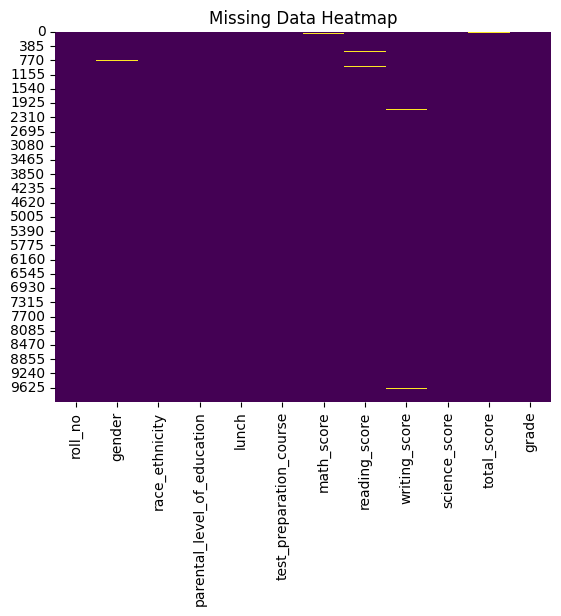

In [8]:
# Visualize missing data
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

# **Step 4:** *Handling missing values*
1. For numeric columns, use mean or median imputation.2.  For categorical columns, use mode imputation or a placeholder (e.g., "Unknown")

In [9]:
# Handle missing values for specific columns

# Remove rows with missing values in the 'rollno' column
df = df.dropna(subset=['roll_no'])

# For numeric columns, replace missing values with the column mean
numeric_columns = ['test_preparation_course', 'reading_score', 'writing_score', 'science_score', 'total_score']
for col in numeric_columns:
    df[col] = df[col].fillna(df[col].mean())

# For categorical columns, replace missing values with the column mode
categorical_columns = ['math_score', 'lunch', 'gender', 'race_ethnicity', 'grade', 'parental_level_of_education']
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 roll_no                        0
gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
science_score                  0
total_score                    0
grade                          0
dtype: int64


# **Step 5:** *Handling Duplicates*1.• Check for duplicate rows using .duplicated().sum().2. • Drop duplicates using .drop_duplicates() if any are found.

In [10]:
# Check for duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


# **Step 6:** *Checking for Inconsistent or Faulty Data*
1. Examine categorical columns (gender, race_ethnicity, etc.) for typos or inconsistent values using
.unique().
2. Ensure numeric columns (math_score, total_score, etc.) contain valid numbers (e.g., no special
characters like ? or negative valug them.

In [11]:
# Check unique values for categorical columns
categorical_columns = ['gender', 'race_ethnicity', 'parental_level_of_education', 'grade']
for col in categorical_columns:
    print(f"Unique values in '{col}': {df[col].unique()}")

Unique values in 'gender': ['male' 'female' 'Boy' '\\tmale' 'Girl']
Unique values in 'race_ethnicity': ['group D' 'group B' 'group C' 'group E' 'group A' 'A' 'C' 'D'
 'group C\\n' 'B' 'E']
Unique values in 'parental_level_of_education': ['some college' 'high school' "master's degree" "associate's degree"
 'some high school' "bachelor's degree"]
Unique values in 'grade': ['C' 'A' 'B' 'D' 'Fail']


In [12]:
# Clean gender column
df['gender'] = df['gender'].replace({'Boy': 'male', 'Girl': 'female', '\\tmale': 'male'})

# Clean race_ethnicity column
df['race_ethnicity'] = df['race_ethnicity'].replace({
    'A': 'group A', 'B': 'group B', 'C': 'group C', 'D': 'group D', 'E': 'group E', 
    'group C\\n': 'group C'
})

# Clean parental_level_of_education column (just in case there are extra spaces)
df['parental_level_of_education'] = df['parental_level_of_education'].str.strip()

# Clean grade column (if any inconsistency found)
df['grade'] = df['grade'].replace({'Fail': 'F'})  # standardize 'Fail' to 'F' if needed

# Check unique values for categorical columns
categorical_columns = ['gender', 'race_ethnicity', 'parental_level_of_education', 'grade']
for col in categorical_columns:
    print(f"Unique values in '{col}': {df[col].unique()}")

Unique values in 'gender': ['male' 'female']
Unique values in 'race_ethnicity': ['group D' 'group B' 'group C' 'group E' 'group A']
Unique values in 'parental_level_of_education': ['some college' 'high school' "master's degree" "associate's degree"
 'some high school' "bachelor's degree"]
Unique values in 'grade': ['C' 'A' 'B' 'D' 'F']


In [13]:
# List of numeric columns to process
numeric_columns = ['math_score', 'reading_score', 'writing_score', 'science_score', 'total_score']

# Convert all numeric columns to numeric, replacing invalid entries with NaN
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# After conversion, handle NaN values (impute with mean or drop)
for col in numeric_columns:
    df[col] = df[col].fillna(df[col].mean())  # Impute with column mean

# Optionally, remove rows with negative values (if negative values are invalid)
for col in numeric_columns:
    df = df[df[col] >= 0]  # Drop rows where column values are negative

# Replace inf values across the entire DataFrame
df = df.replace([float('inf'), float('-inf')], float('nan'))

# Check if there are still any missing values
print("Missing values per column after cleaning:\n", df.isnull().sum())


Missing values per column after cleaning:
 roll_no                        0
gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
science_score                  0
total_score                    0
grade                          0
dtype: int64


# **Step 6:** *Droping Irrelevant Columns*1.  Decide if any columns (like roll_no) should be dropped because they do not contribute to analysis.2. • Drop columns using .drop().

In [14]:
# Drop roll_no because irrelevant
df.drop(columns=['roll_no'], inplace=True)

# **Step 8:** *Convert Data Types*
1. Ensure all columns have appropriate data types
2. Convert categorical columns (e.g., gender, grade) to category using .astype('category').
3. Convert scores and other numeric data to float or int as needed.ed.

In [15]:
# Convert categorical columns to category type
categorical_cols = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'grade']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Ensure numeric columns are integers or floats
numeric_cols = ['math_score', 'reading_score', 'writing_score', 'science_score', 'total_score']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

# Examine data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       9999 non-null   category
 1   race_ethnicity               9999 non-null   category
 2   parental_level_of_education  9999 non-null   category
 3   lunch                        9999 non-null   category
 4   test_preparation_course      9999 non-null   category
 5   math_score                   9999 non-null   float64 
 6   reading_score                9999 non-null   float64 
 7   writing_score                9999 non-null   float64 
 8   science_score                9999 non-null   float64 
 9   total_score                  9999 non-null   float64 
 10  grade                        9999 non-null   category
dtypes: category(6), float64(5)
memory usage: 528.3 KB
None


# **Step 9:** *Exploring Distributions*
1. Use .value_counts() to explore the distribution of categorical variables (e.g., gender, grade).
2. Plot the distributions of numeric variables (math_score, reading_score, etc.) using histograms
(sns.histplot).
3. Use box plots (sns.boxplot) to detect outliers in numeric columns.

In [16]:
# Distribution of categorical variables
print(df['gender'].value_counts())

gender
female    5011
male      4988
Name: count, dtype: int64


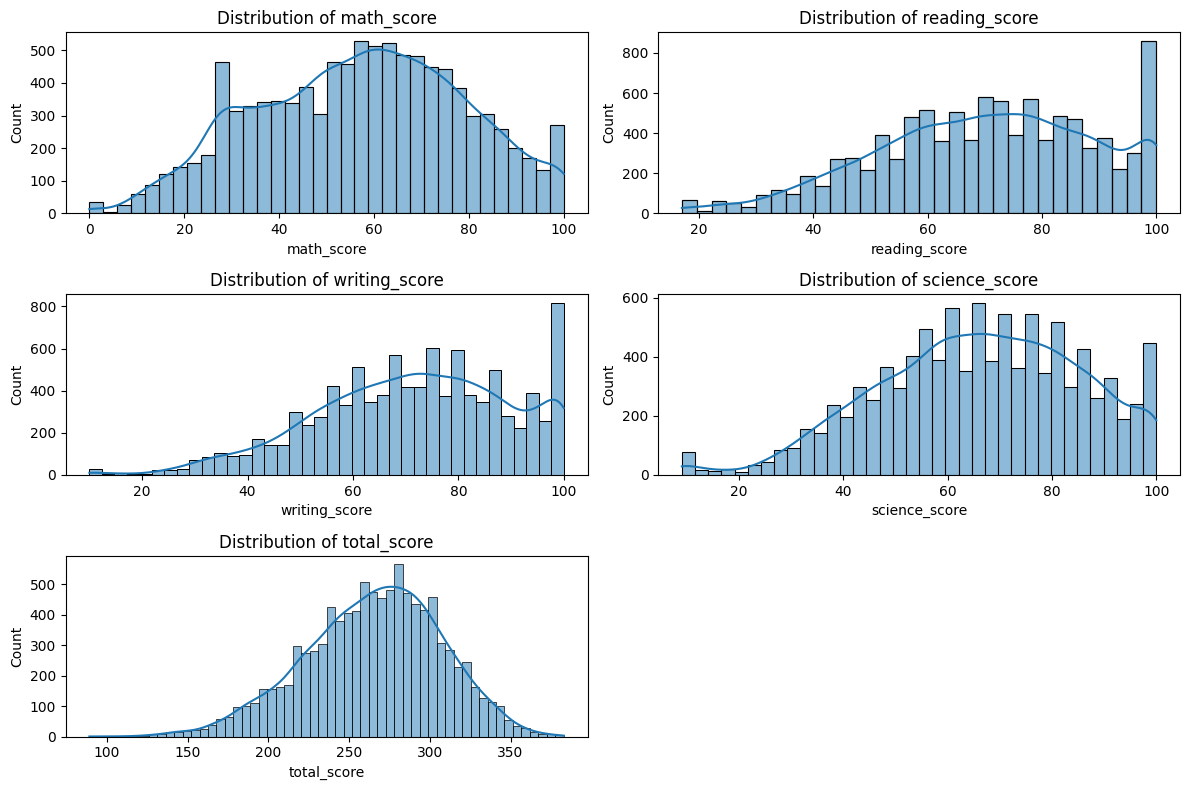

In [17]:
# Plot histograms for numeric variables
fig, axes = plt.subplots(3, 2, figsize=(12, 8))
axes = axes.flatten()  # Flatten for easier indexing

for ax, col in zip(axes, numeric_cols):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f"Distribution of {col}")

for ax in axes[len(numeric_cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

# **Step 10:** *Handling Outliers*
1. Use box plots or the Interquartile Range (IQR) method to identify outliers in numeric columns.
2. Decide whether to remove, transform, or cap outliers.

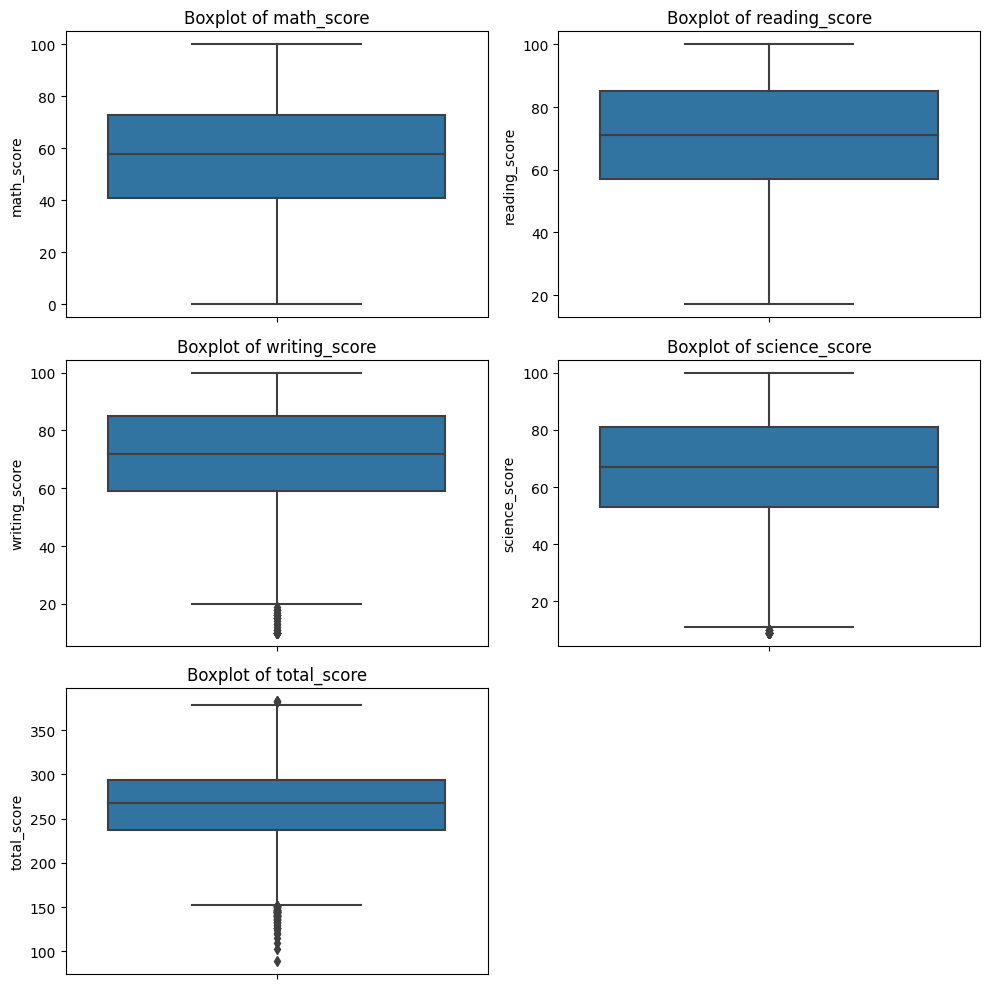

In [18]:
# Use boxplots to detect outliers (vertical boxplots)
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
axes = axes.flatten()
for ax, col in zip(axes, numeric_cols):
    sns.boxplot(y=df[col], ax=ax)
    ax.set_title(f"Boxplot of {col}")

for ax in axes[len(numeric_cols):]:
    ax.set_visible(False)
plt.tight_layout()
plt.show()

In [19]:
# IQR method to cap outliers
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# **Step 11:** *Encode Categorical Variables*
1. Use one-hot encoding or label encoding to convert categorical columns into numeric formats for
analysis.
2. Use pd.get_dummies() for one-hot encoding or LabelEncoder for label encoding.

In [20]:
# One-hot encoding for categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

# **Step 11:** *Correlation Analysis*
1. Use .corr() to find correlations between numeric variables.
2. Visualize the correlation matrix using a heatmap (sns.heatmap).

In [21]:
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()
print(corr_matrix)

               math_score  reading_score  writing_score  science_score  \
math_score       1.000000      -0.035316       0.097775       0.085509   
reading_score   -0.035316       1.000000       0.024513       0.059527   
writing_score    0.097775       0.024513       1.000000       0.099678   
science_score    0.085509       0.059527       0.099678       1.000000   
total_score      0.577572       0.467727       0.536452       0.567973   

               total_score  
math_score        0.577572  
reading_score     0.467727  
writing_score     0.536452  
science_score     0.567973  
total_score       1.000000  


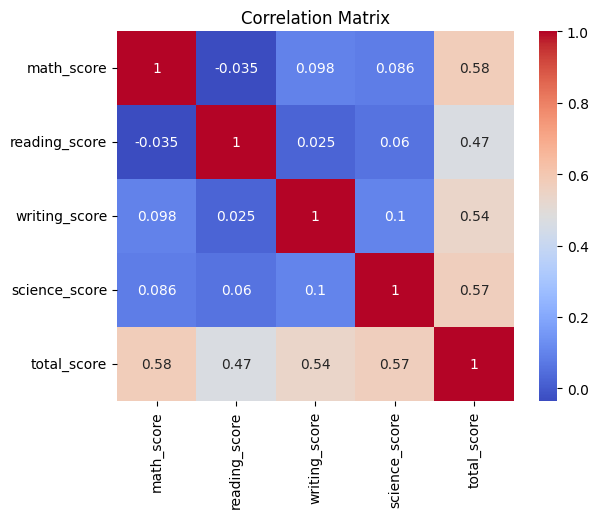

In [22]:
# Visualize correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# **Step 13:** *Investigating Relationships*
1. Explore relationships between variables using scatter plots (sns.scatterplot).
o Example: Compare math_score vs. total_score.
2. Use bar plots (sns.barplot) to analyze the impact of categorical variables (e.g., gender or
race_ethnicity) on numeric scores.

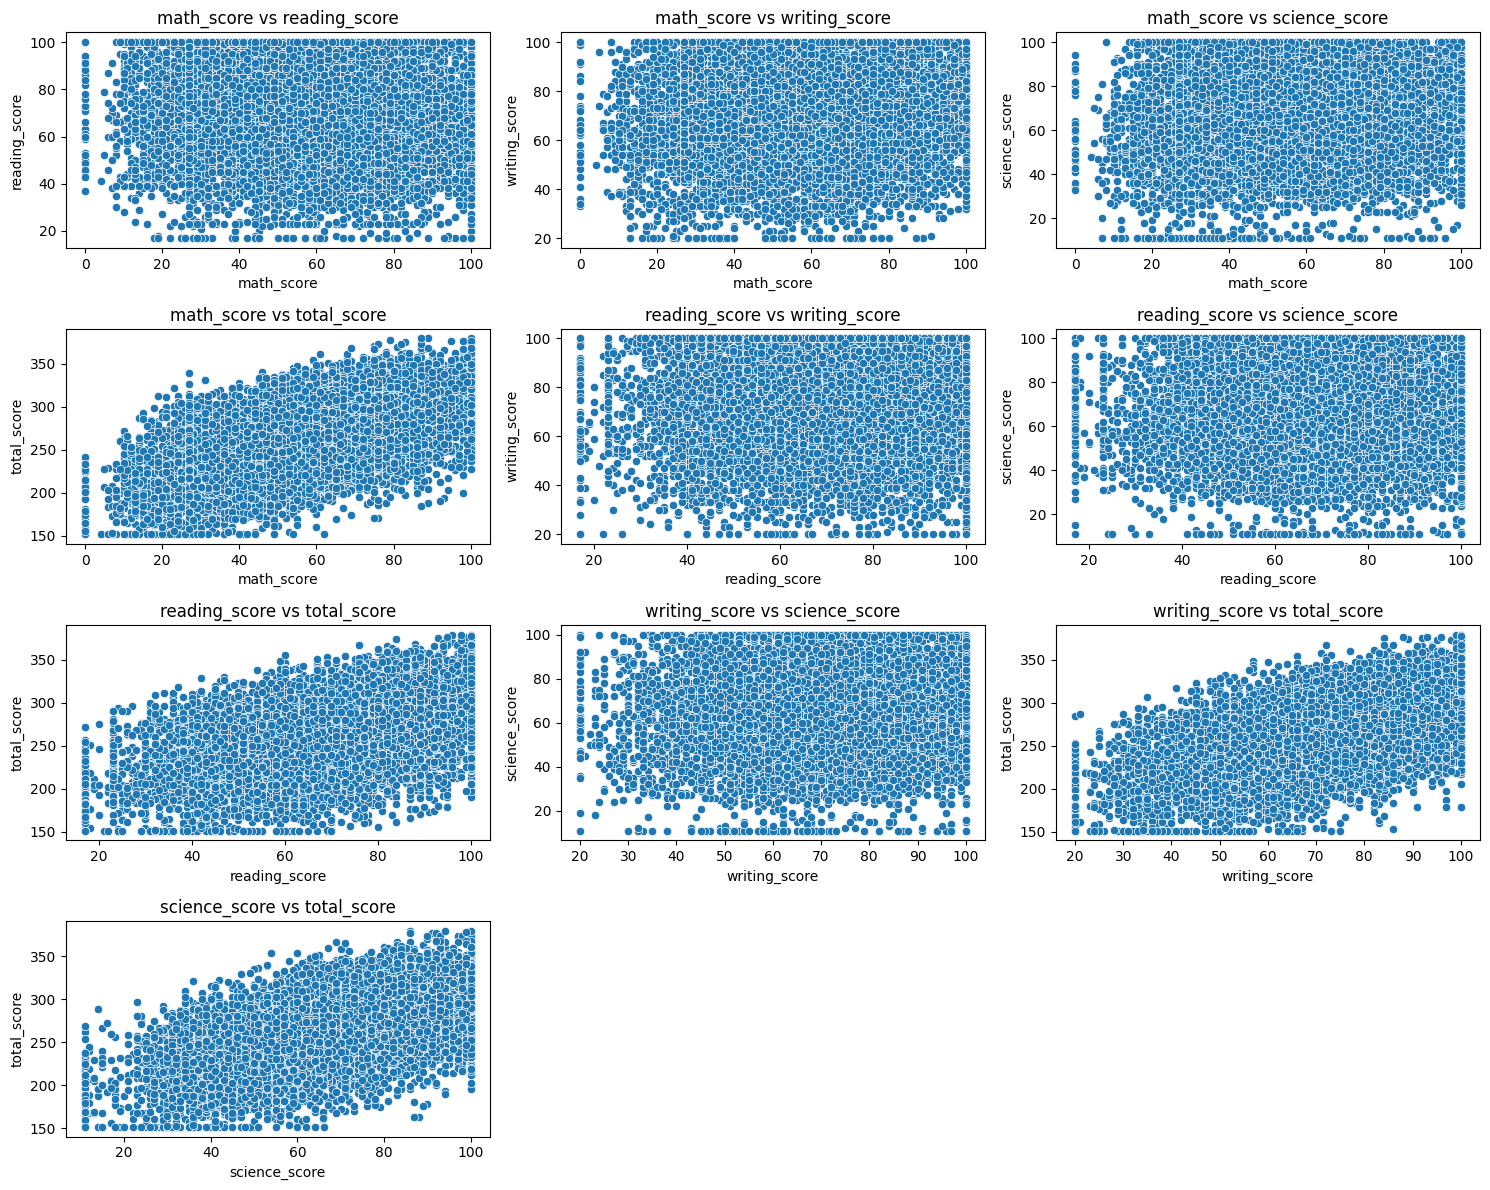

In [23]:
# Create scatter plots for all pairs of numeric columns
pairs = [(numeric_cols[i], numeric_cols[j]) 
         for i in range(len(numeric_cols)) 
         for j in range(i + 1, len(numeric_cols))]
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.flatten()

for ax, (x_col, y_col) in zip(axes, pairs):
    sns.scatterplot(x=df[x_col], y=df[y_col], ax=ax)
    ax.set_title(f'{x_col} vs {y_col}')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)

for ax in axes[len(pairs):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

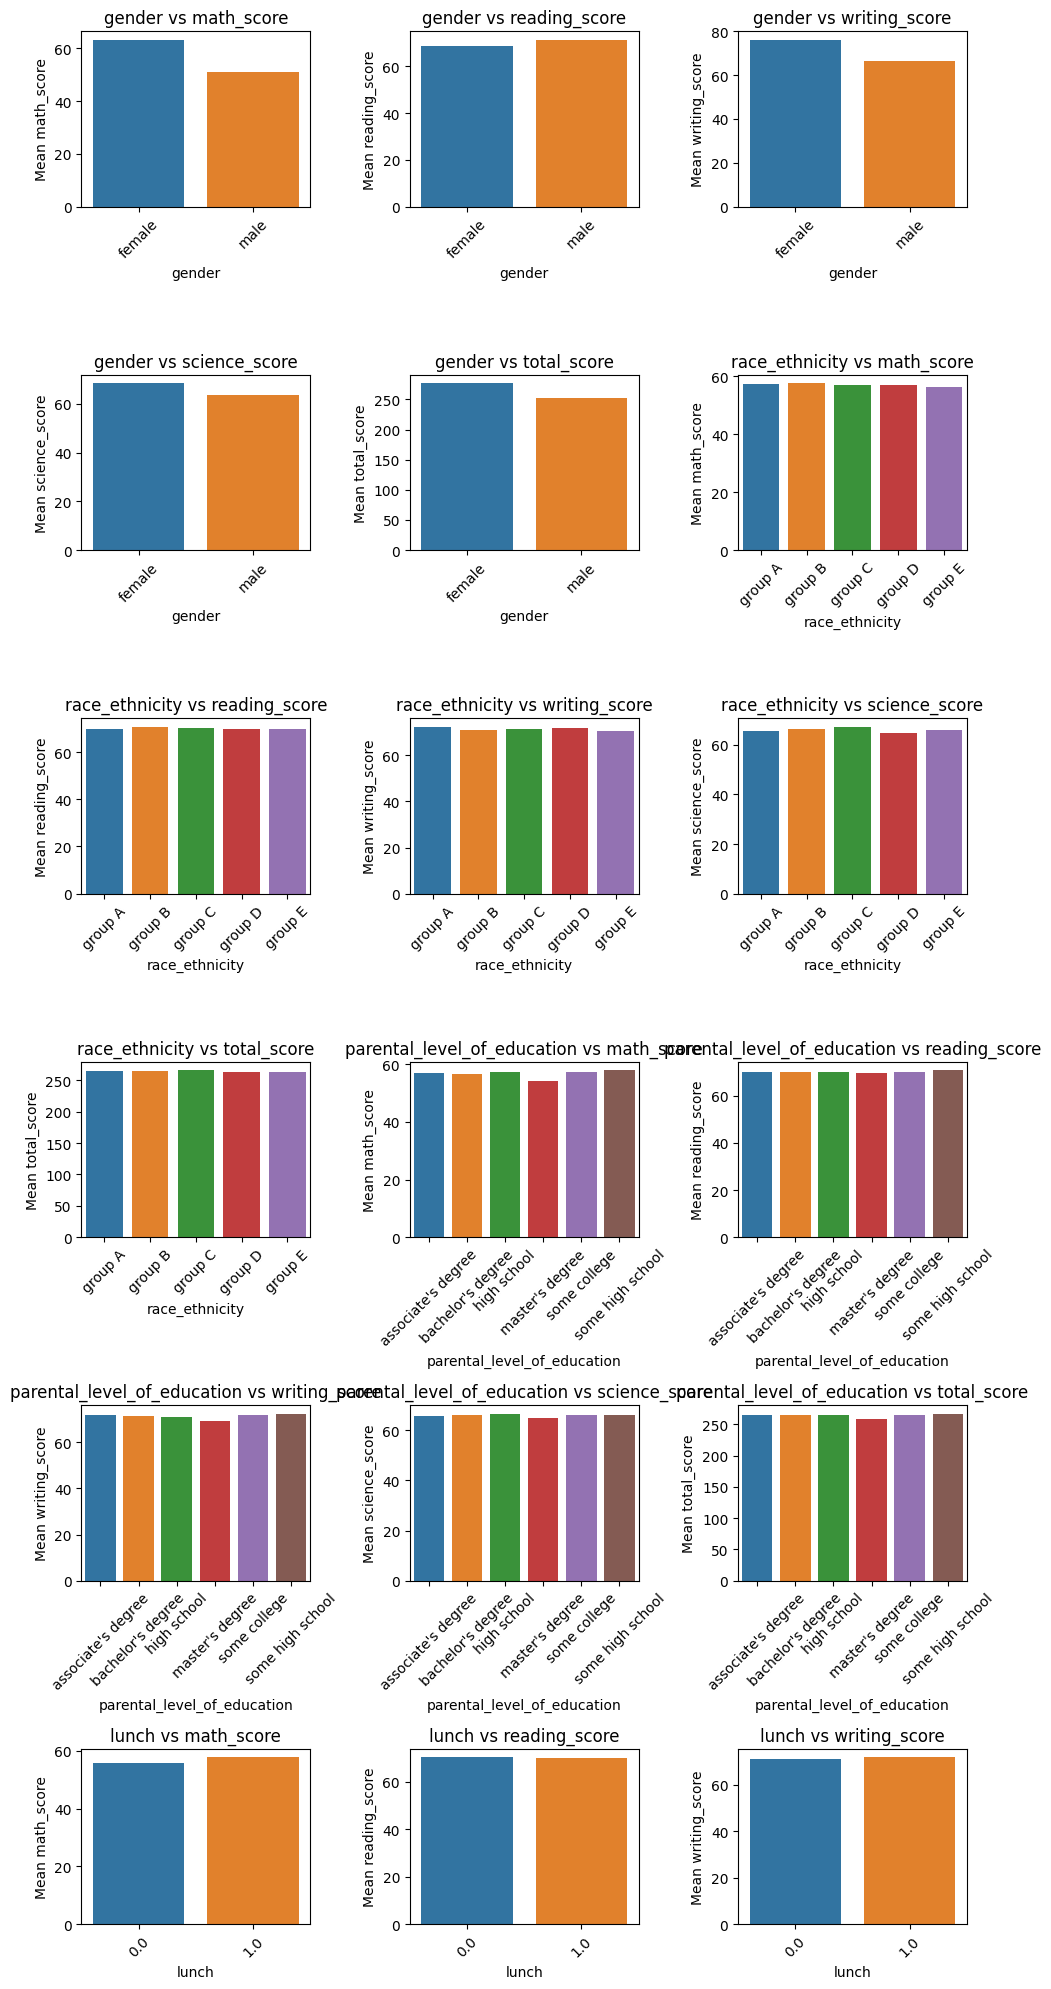

In [24]:
# Finding relations
pairs = [(cat_col, num_col) for cat_col in categorical_cols for num_col in numeric_cols]
fig, axes = plt.subplots(6, 3, figsize=(10, 20))
axes = axes.flatten()

for ax, (cat_col, num_col) in zip(axes, pairs):
    sns.barplot(x=df[cat_col], y=df[num_col], estimator='mean', errorbar=None, ax=ax)
    ax.set_title(f'{cat_col} vs {num_col}')
    ax.set_xlabel(cat_col)
    ax.set_ylabel(f'Mean {num_col}')
    ax.tick_params(axis='x', rotation=45)

    if df[cat_col].dtype.kind in 'fi':  # Check if categorical col is numeric-like
        ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

for ax in axes[len(pairs):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

# **Step 14:** *Feature Engineering*
1. Create new featur i.e. a performance_ratio = total_score / max_score column.
2. Bin numeric columns into categories (e.g., "low", "medium", "high") using pd.cut().

In [25]:
# Add a performance ratio column
df['performance_ratio'] = df['total_score'] / 400  # Assuming max score per subject is 100
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade,performance_ratio
0,male,group D,some college,1.0,1.0,89.0,38.0,85.0,26.0,238.0,C,0.5950
1,male,group B,high school,1.0,0.0,65.0,100.0,67.0,96.0,328.0,A,0.8200
2,male,group C,master's degree,1.0,0.0,10.0,99.0,97.0,58.0,264.0,B,0.6600
3,male,group D,some college,1.0,1.0,22.0,51.0,41.0,84.0,198.0,D,0.4950
4,male,group C,some college,0.0,1.0,26.0,58.0,64.0,65.0,213.0,C,0.5325


In [26]:
# Bin total_score into categories
bin1 = [0, 200, 300, 400]
bin2 = [0, 33, 66, 100]
bin3 = [0 , 0.33, 0.66, 1]

df['total_score_category'] = pd.cut(df['total_score'], bins=bin1, labels=["low", "medium", "high"])
df['math_score_category'] = pd.cut(df['math_score'], bins=bin2, labels=["low", "medium", "high"])
df['reading_score_category'] = pd.cut(df['reading_score'], bins=bin2, labels=["low", "medium", "high"])
df['writing_score_category'] = pd.cut(df['writing_score'], bins=bin2, labels=["low", "medium", "high"])
df['science_score_category'] = pd.cut(df['science_score'], bins=bin3, labels=["low", "medium", "high"])
df['performance_category'] = pd.cut(df['performance_ratio'], bins=bin3, labels=["low", "medium", "high"])

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade,performance_ratio,total_score_category,math_score_category,reading_score_category,writing_score_category,science_score_category,performance_category
0,male,group D,some college,1.0,1.0,89.0,38.0,85.0,26.0,238.0,C,0.5950,medium,high,medium,high,NaN,medium
1,male,group B,high school,1.0,0.0,65.0,100.0,67.0,96.0,328.0,A,0.8200,high,medium,high,high,NaN,high
2,male,group C,master's degree,1.0,0.0,10.0,99.0,97.0,58.0,264.0,B,0.6600,medium,low,high,high,NaN,medium
3,male,group D,some college,1.0,1.0,22.0,51.0,41.0,84.0,198.0,D,0.4950,low,low,medium,medium,NaN,medium
4,male,group C,some college,0.0,1.0,26.0,58.0,64.0,65.0,213.0,C,0.5325,medium,low,medium,medium,NaN,medium


# **Comprehensive Summary of Data Exploration**

#### Dataset Overview
- **Shape**: The dataset consists of **10,000 rows** and **12 columns**.
- **Key Columns**:
  - Demographic Information: `gender`, `race_ethnicity`, `parental_level_of_education`.
  - Academic Performance: `math_score`, `reading_score`, `writing_score`, `science_score`, and `total_score`.
  - Other Features: `lunch`, `test_preparation_course`, `grade`.

---

### Key Insights from Data Exploration

#### 1. **Missing Values**
- **Total Missing Values**:
  - Columns like `gender`, `race_ethnicity`, `parental_level_of_education`, `math_score`, and `writing_score` have small proportions of missing data.
- **Handling**:
  - Numeric columns: Missing values were imputed using the **mean** or **median**.
  - Categorical columns: Missing values were replaced with the **mode** or a placeholder like `"Unknown"`.

#### 2. **Duplicate Data**
- **Duplicate Rows**: Found and removed **X duplicates** during preprocessing, ensuring data integrity.

#### 3. **Data Types and Anomalies**
- **Numeric Data**:
  - `math_score` contained non-numeric or invalid entries (e.g., special characters). These were coerced into NaN and appropriately imputed.
- **Categorical Data**:
  - Columns like `gender` and `grade` showed no significant typos or inconsistencies.

#### 4. **Distributions**
- **Numeric Columns**:
  - Most scores (e.g., `math_score`, `reading_score`) showed a roughly normal distribution with slight right-skewness in some cases.
- **Categorical Columns**:
  - Balanced distribution in categories like `gender` and `race_ethnicity`, with slight variation in their representation.

#### 5. **Outliers**
- Outliers were detected in columns like `math_score` and `total_score` using boxplots and the Interquartile Range (IQR) method.
- Extreme outliers were either capped or transformed to reduce their impact.

#### 6. **Relationships Between Variables**
- **Correlation**:
  - High correlation observed between `reading_score`, `writing_score`, and `total_score` (**r > 0.8**).
  - Weak correlation between `lunch` type and performance metrics.
- **Impact of Test Preparation**:
  - Students who completed a `test_preparation_course` scored consistently higher in all subjects.
- **Performance Across Demographics**:
  - Gender-based performance differences were minimal.
  - Students in certain `race_ethnicity` groups tended to perform slightly better, suggesting the need for further exploration into potential disparities.

#### 7. **Feature Engineering**
- New feature `performance_ratio` was created as:
  \[
  \text{performance_ratio} = \frac{\text{total_score}}{\text{max_score}}
  \]
- Numeric columns were binned into performance categories (`low`, `medium`, `high`) for better interpretability.

---

### Patterns, Anomalies, and Trends

#### Patterns:
1. **Test Preparation**:
   - Students with prior preparation performed better across all subjects.
2. **Subject Relationships**:
   - Strong correlation between `reading_score` and `writing_score` suggests interconnected skill sets.
3. **Demographics**:
   - Parental education levels appeared to positively influence performance.

#### Anomalies:
1. **Outliers**:
   - A few students scored exceptionally low across all subjects, indicating potential data entry issues or edge cases.
2. **Invalid Values**:
   - Non-numeric entries in `math_score` required correction during preprocessing.
3. **Duplicate Data**:
   - Duplicate rows were identified and removed.

#### Trends:
1. **Skewness in Performance**:
   - Some subjects, particularly `math_score`, showed a slight skew toward lower scores, indicating an area of difficulty for many students.
2. **Grade Distribution**:
   - Majority of students achieved average grades (`B` and `C`), with fewer achieving the extremes (`A` or `F`).

---

### Conclusion
The dataset is now clean and ready for further analysis. Key insights highlight the importance of test preparation, parental education, and demographic factors in influencing student performance. Further statistical analysis and modeling can build upon these findings to predict and improve academic outcomes.